In [3]:
pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [6]:
table = soup.find_all("table")[2]

In [7]:
table.find_all("th")

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Profits<br/>(USD millions)
 </th>]

In [8]:
col = [tab.text.strip() for tab in table.find_all("th")]
col

['Rank', 'Name', 'Industry', 'Profits(USD millions)']

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(columns = col)

In [11]:
data = table.find_all("tr")
for dat in data[1:]:
    row_data = (dat.find_all("td"))
    ind_row_data = [row_dat.text.strip() for row_dat in row_data]
    print(ind_row_data)
    lent = len(df)
    df.loc[lent] = ind_row_data

['1', 'Apple', 'Electronics', '96,995']
['2', 'Berkshire Hathaway', 'Conglomerate', '96,223']
['3', 'Alphabet', 'Technology', '73,795']
['4', 'Microsoft', 'Technology', '72,361']
['5', 'JPMorgan Chase', 'Financials', '49,552']
['6', 'Meta Platforms', 'Technology', '39,098']
['7', 'ExxonMobil', 'Petroleum industry', '36,010']
['8', 'Johnson & Johnson', 'Pharmaceutical industry', '35,153']
['9', 'Amazon', 'Retail/Technology', '30,425']
['10', 'Nvidia', 'Technology', '29,760']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   10 non-null     object
 1   Name                   10 non-null     object
 2   Industry               10 non-null     object
 3   Profits(USD millions)  10 non-null     object
dtypes: object(4)
memory usage: 400.0+ bytes


In [13]:
# df["Rank"] = df["Rank"].astype(int)
df["Profits(USD millions)"] = df["Profits(USD millions)"].str.replace(",","")
df["Profits(USD millions)"] = df["Profits(USD millions)"].astype(int)

In [14]:
df

,Rank,Name,Industry,Profits(USD millions)
0,1,Apple,Electronics,96995
1,2,Berkshire Hathaway,Conglomerate,96223
2,3,Alphabet,Technology,73795
3,4,Microsoft,Technology,72361
4,5,JPMorgan Chase,Financials,49552
5,6,Meta Platforms,Technology,39098
6,7,ExxonMobil,Petroleum industry,36010
7,8,Johnson & Johnson,Pharmaceutical industry,35153
8,9,Amazon,Retail/Technology,30425
9,10,Nvidia,Technology,29760


In [15]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import psycopg2

In [17]:
host = "localhost"
port = "5432"
user = "postgres"
password = "YbabyLO@02#"

conn = psycopg2.connect(
    user = user,
    password = password,
    host = host,
    port = port
)

conn.autocommit = True
cur = conn.cursor()


In [18]:
create_db = '''"create database companies"'''
cur.execute(create_db)

SyntaxError: syntax error at or near ""create database companies""
LINE 1: "create database companies"
        ^


In [54]:
cur.close()
conn.close()

In [57]:
host = "localhost"
port = "5432"
user = "postgres"
password = "YbabyLO@02#"
db = "companies"

conn = psycopg2.connect(
    dbname = db,
    user = user,
    password = password,
    host = host,
    port = port
)

conn.autocommit = True
cur = conn.cursor()


In [62]:
create_table = '''create table rich_by_price(
    "Rank" int primary key,
    "Name" varchar(50),
    "Industry" varchar(50),
    "Profits" int
    );
'''

cur.execute(create_table)

cur.close()

In [71]:
conn.commit()

In [68]:
cur = conn.cursor()
insert_into = '''insert into rich_by_price( "Rank", "Name", "Industry", "Profits")
Values (%s, %s, %s, %s)
'''

for index,row in df.iterrows():
    cur.execute(insert_into,list(row))


cur.close()

In [73]:
cur = conn.cursor()
select_from = ''' select * from rich_by_price'''

cur.execute(select_from)

rowss = cur.fetchall()

for row in rowss:
    print(row) 

(1, 'Apple', 'Electronics', 96995)
(2, 'Berkshire Hathaway', 'Conglomerate', 96223)
(3, 'Alphabet', 'Technology', 73795)
(4, 'Microsoft', 'Technology', 72361)
(5, 'JPMorgan Chase', 'Financials', 49552)
(6, 'Meta Platforms', 'Technology', 39098)
(7, 'ExxonMobil', 'Petroleum industry', 36010)
(8, 'Johnson & Johnson', 'Pharmaceutical industry', 35153)
(9, 'Amazon', 'Retail/Technology', 30425)
(10, 'Nvidia', 'Technology', 29760)


In [1]:
pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/7.8 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/7.8 MB 2.1 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 2.2 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 2.3 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 2.3 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 2.3 MB/s eta 0:00:02
   -------------------------- -----------

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

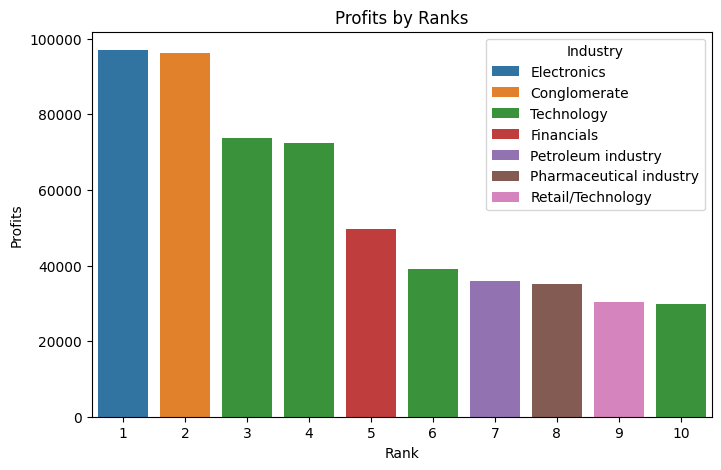

In [21]:
plt.figure(figsize= (8,5))
sns.barplot( x="Rank", y= "Profits(USD millions)", hue="Industry", data = df)

plt.title("Profits by Ranks")
plt.xlabel("Rank")
plt.ylabel("Profits")

plt.show()

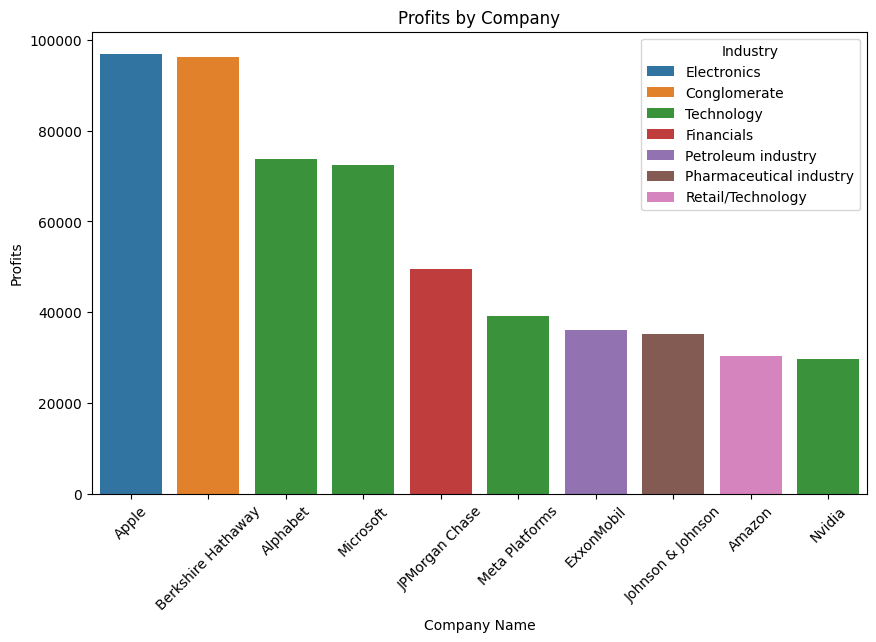

In [23]:
plt.figure(figsize = (10,6))

sns.barplot( x="Name", y="Profits(USD millions)", hue="Industry", data= df)

plt.xticks(rotation=45)

plt.title("Profits by Company")
plt.xlabel("Company Name")
plt.ylabel("Profits")
plt.show()